In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../../dlg_slack_competition'))
	print(os.getcwd())
except:
	pass


In [2]:
# !pip install pep8 flake8 autopep8 pylint japanize-matplotlib kaggle python-language-server pyls python-dotenv networkx wordcloud pandas numpy pandas-profiling matplotlib seaborn janome
# !pip install xlwt
# !pip install openpyxl


In [3]:
import csv
import datetime

from IPython.display import display
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

from utils import dictionary
from utils import user_list
from utils import slack

df = pd.read_csv('input/talks_processing.csv')


In [4]:
# 以下のカラムを抽出
df = df[['channel_id', 'talk_user', 'text', 'thread_ts', 'ts', 'date']]

# ignore_listのユーザーを削除
ignore_list = [
    'Slackbot',
    'GitHub',
    '村上 智之',
    '國分咲良',
    '岡村龍弥'
]
df.drop(df.index[df['talk_user'].isin(ignore_list)], inplace=True)

# {名前：参加日時}の辞書作成
get_dict = dictionary.GetDict()
selfintro_date_dict = get_dict.selfintro_datetime('%Y-%m-%d')
# print(join_date_dict['西川時久'])
# talk_userカラムを複製
df['intro_date'] = df['talk_user'].copy()

# 参加日時で置換
df['intro_date'] = df['intro_date'].map(selfintro_date_dict)
df['intro_date'] = pd.to_datetime(df['intro_date'])
# 'date'列をstr->datetime.datetimeに変換
df['date'] = pd.to_datetime(df['date'])
df['elapsed'] = df['date'] - df['intro_date']
df['elapsed_obj'] = df['elapsed'].astype(np.object)
df['elapsed_obj_num'] = [str(i).split()[0] for i in df['elapsed_obj']]
df['elapsed_nat_to_-1'] = ['-1' if i ==
                           'NaT' else i for i in df['elapsed_obj_num']]

# print(df['elapsed_nat_to_-1'])
df['elapsed_int'] = df['elapsed_nat_to_-1'].astype(np.int64)

# print(df['elapsed_int'])

# display(df.groupby('talk_user').count().sort_values('text', ascending=False).head(50))


In [5]:
get_list = user_list.GetList()

rank_a_list = get_list.selfintro_users_enroll_rank('a', 1)
rank_a_unsub_list = ['Kotaro Isobe']

rank_b_list = get_list.selfintro_users_enroll_rank('b', 1)
rank_b_unsub_list = get_list.selfintro_users_enroll_rank('b', 0)

rank_c_list = get_list.selfintro_users_enroll_rank('c', 1)
rank_c_unsub_list = get_list.selfintro_users_enroll_rank('c', 0)



/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


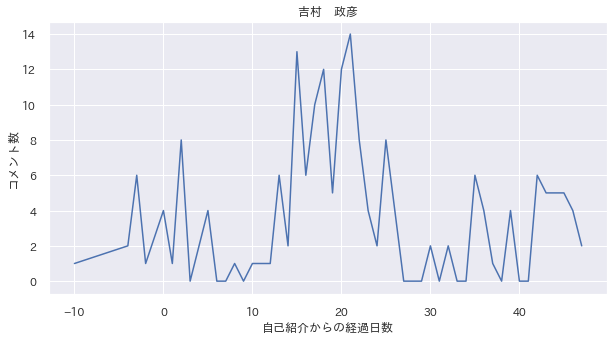

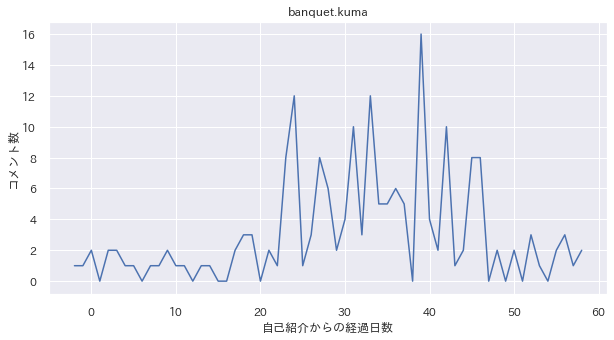

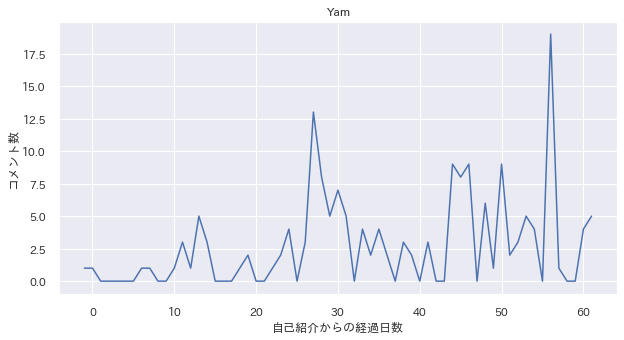

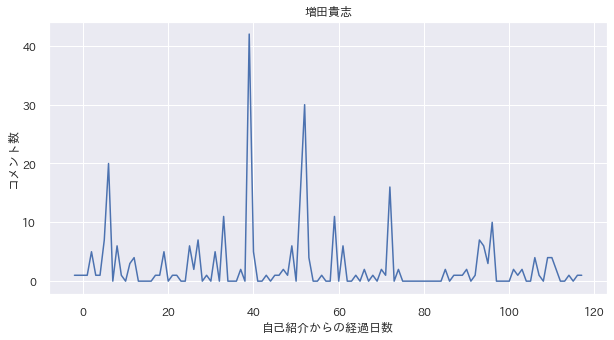

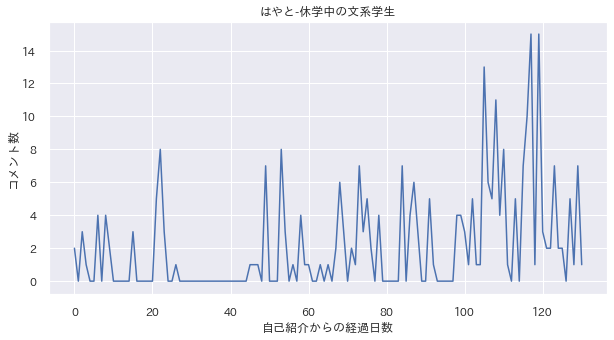

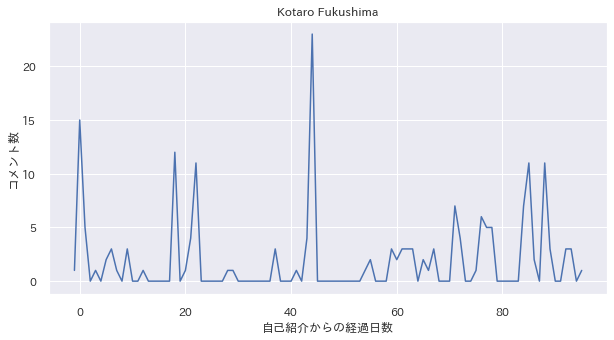

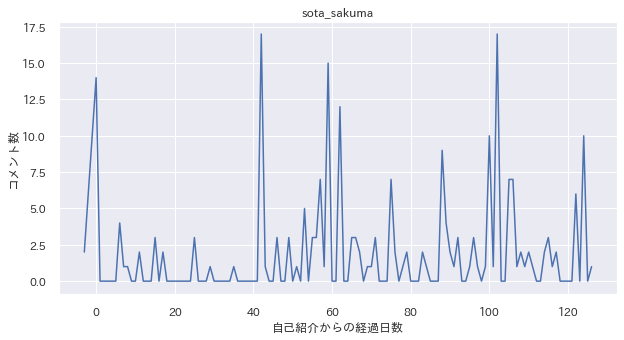

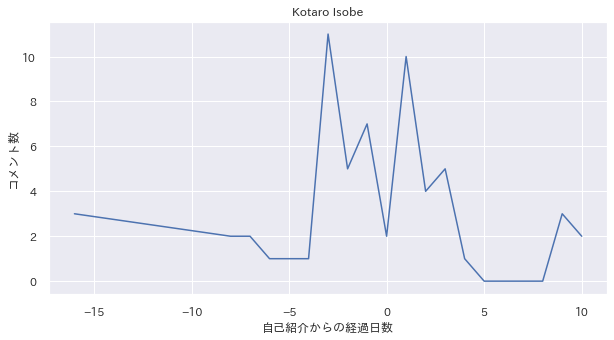

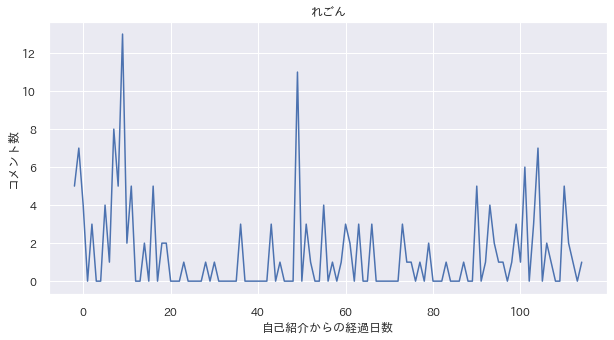

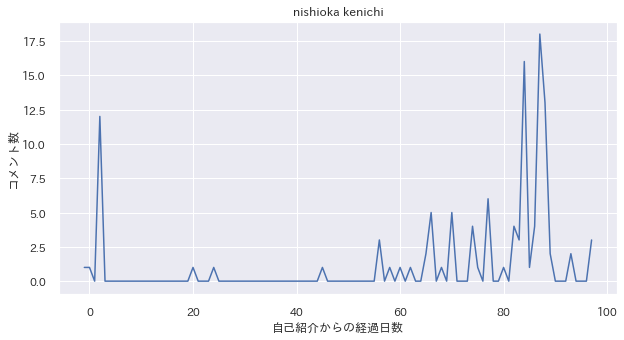

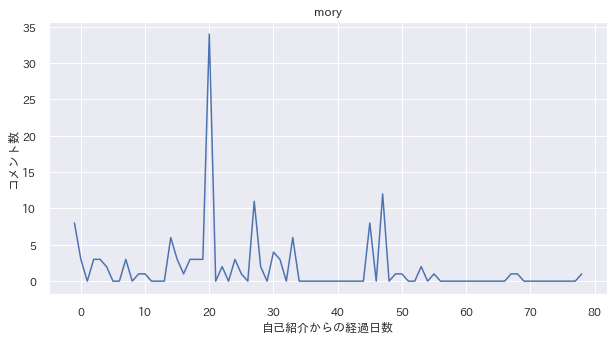

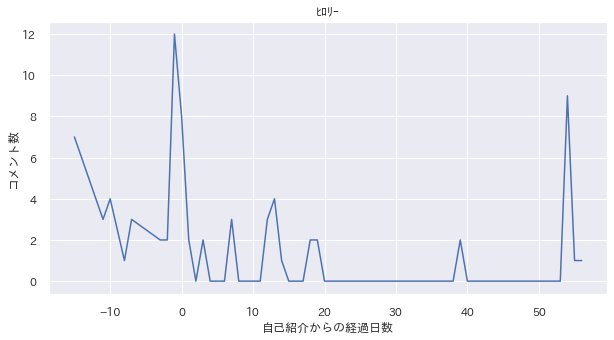

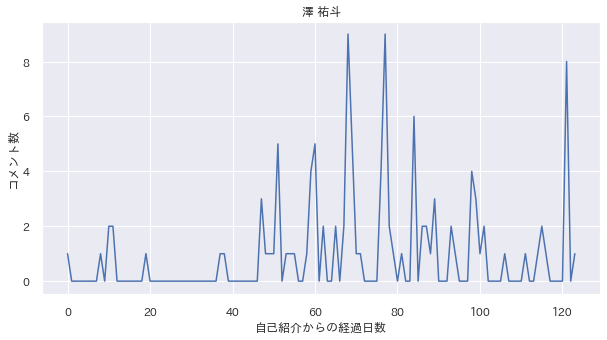

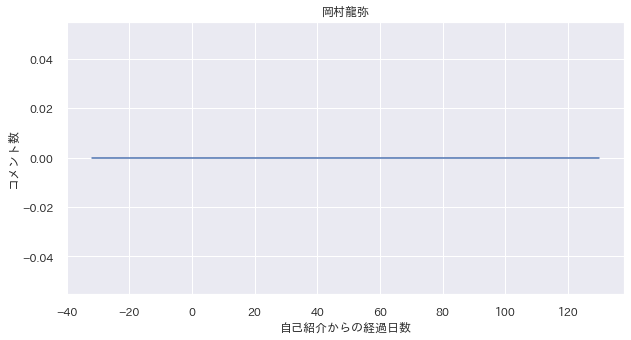

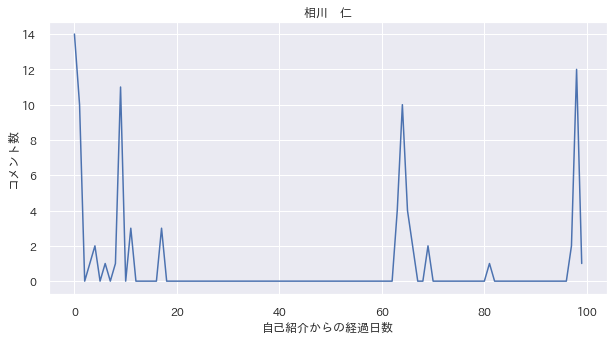

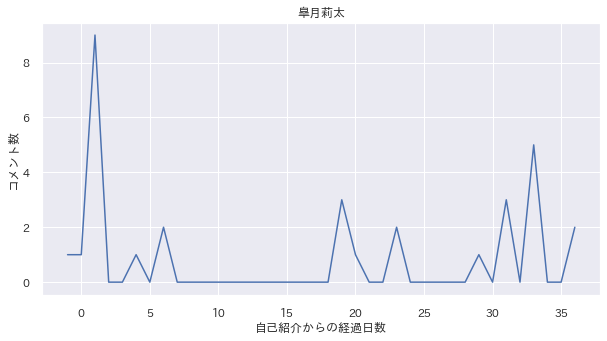

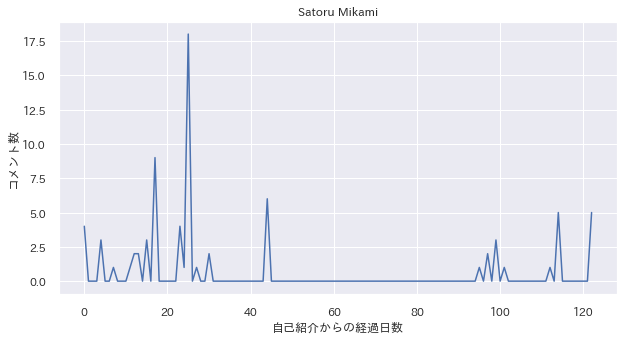

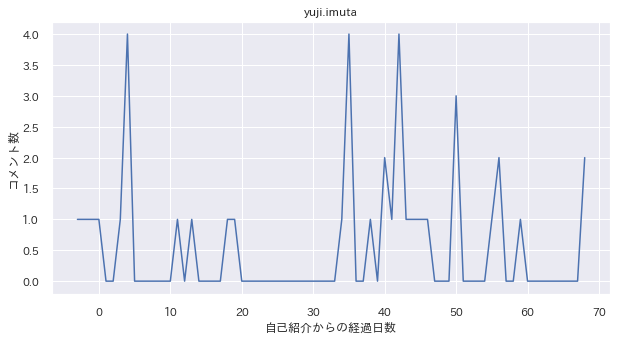

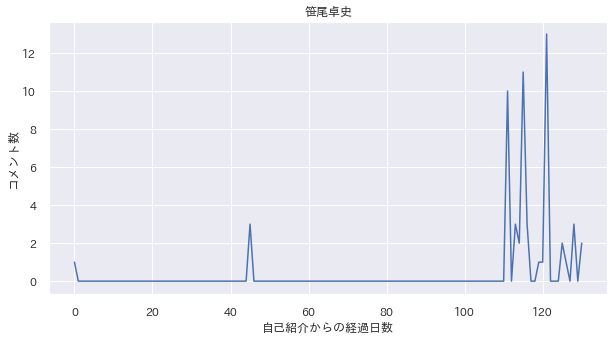

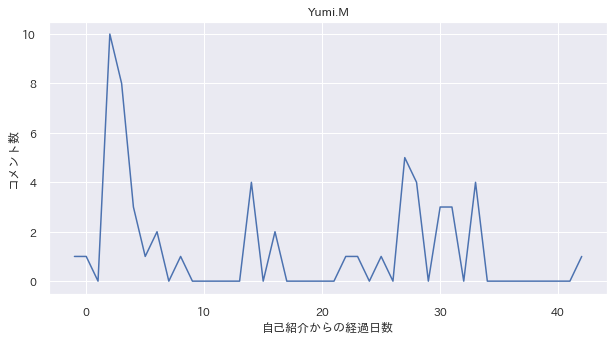

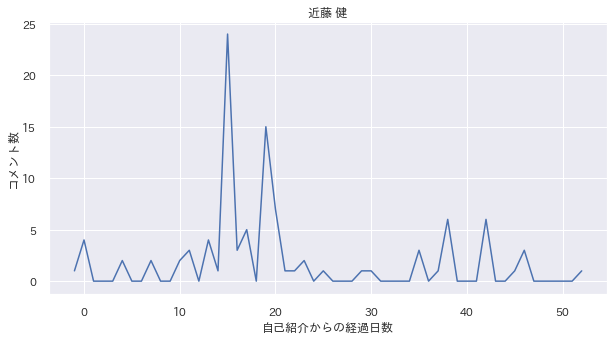

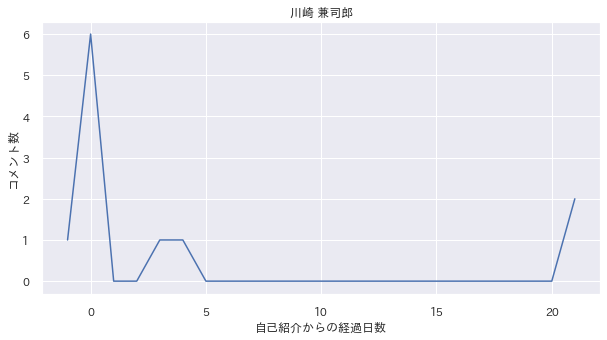

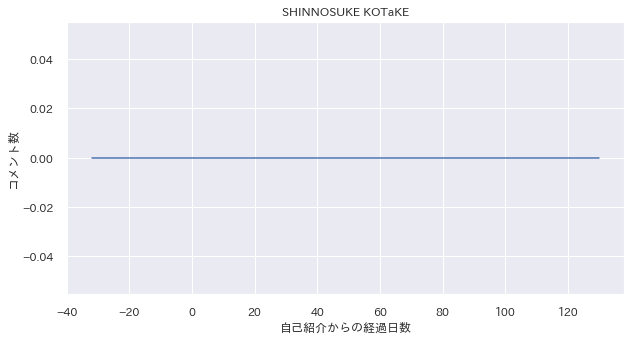

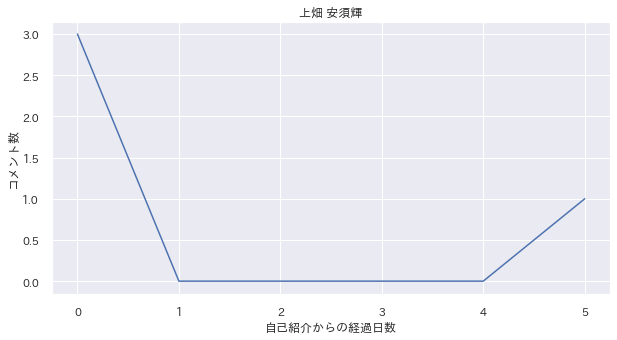

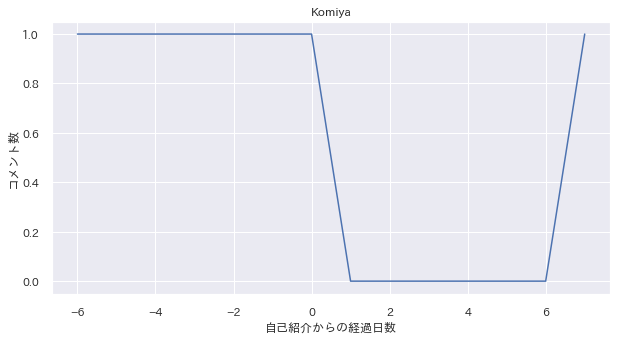

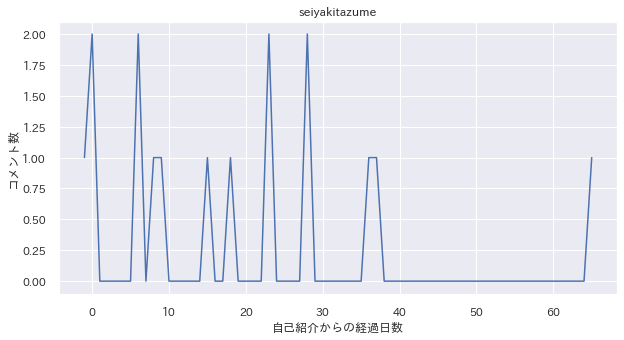

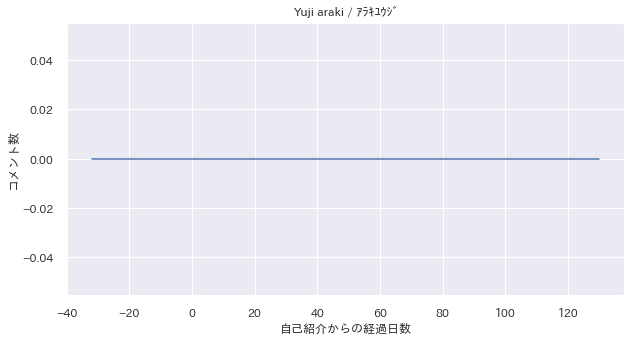

Yuji araki / ｱﾗｷﾕｳｼﾞの画像書き出しに失敗しました


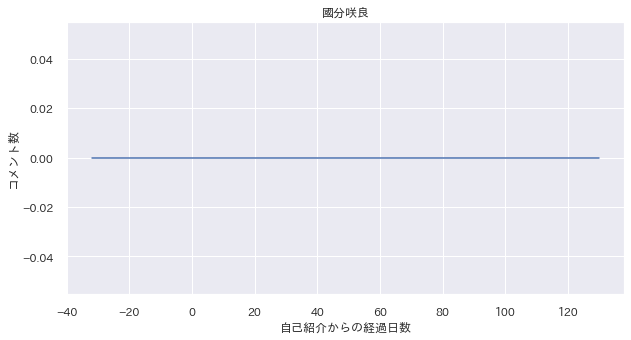

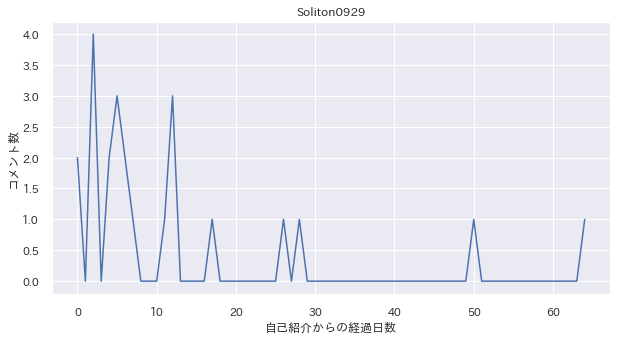

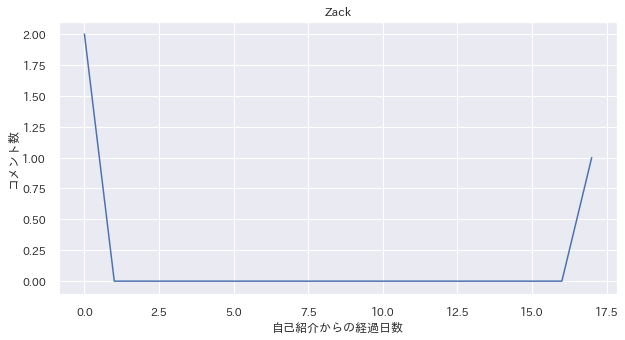

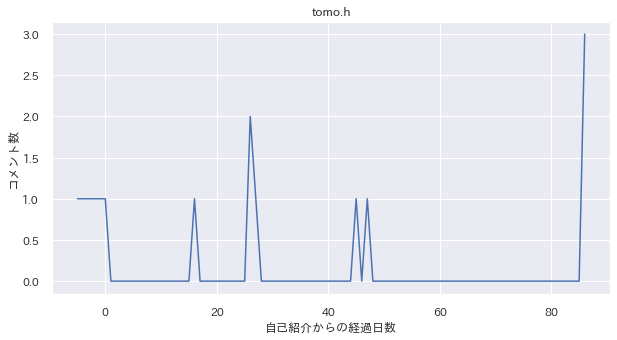

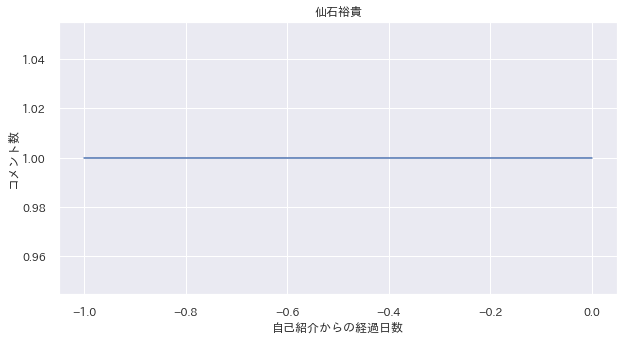

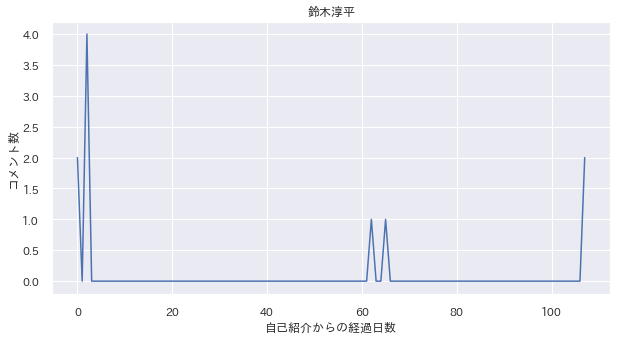

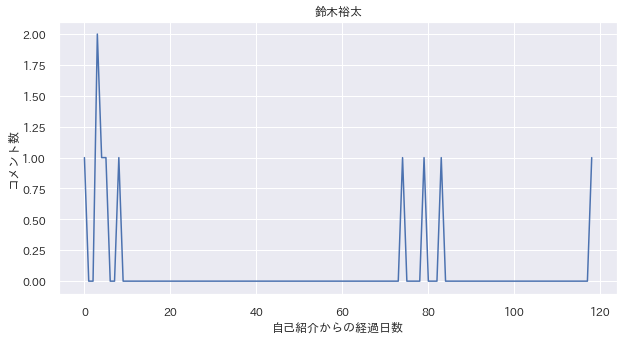

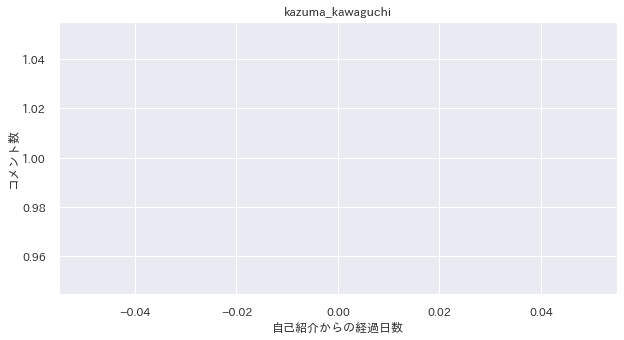

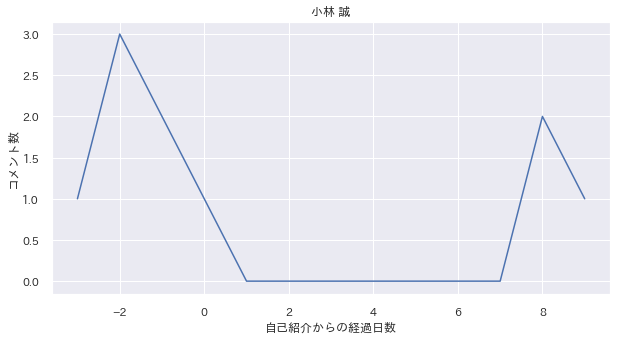

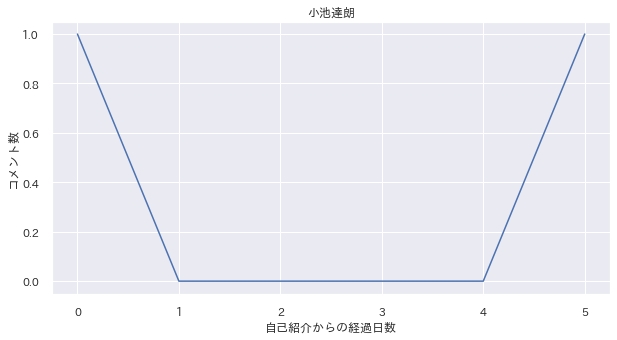

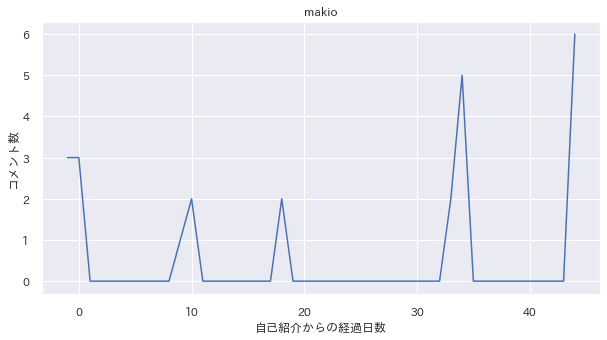

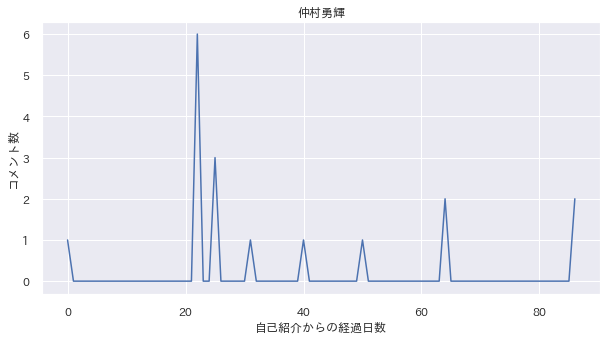

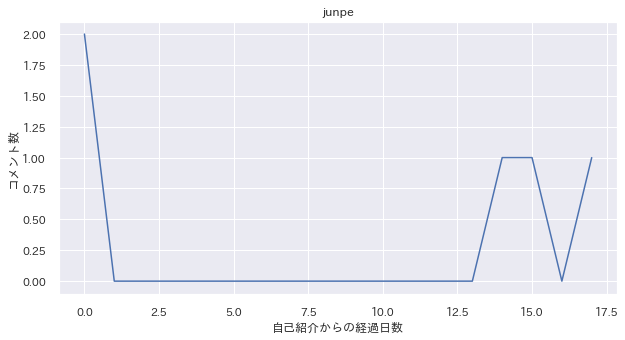

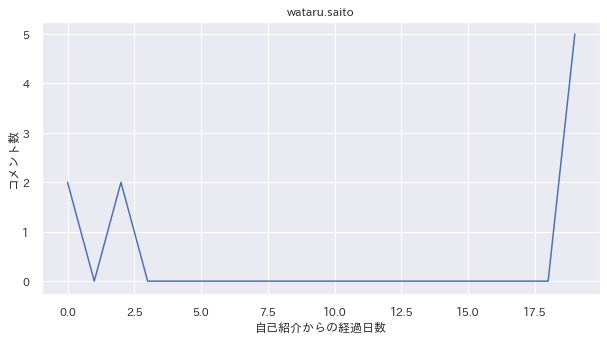

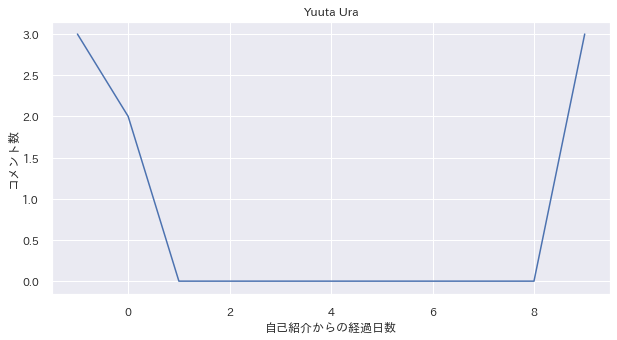

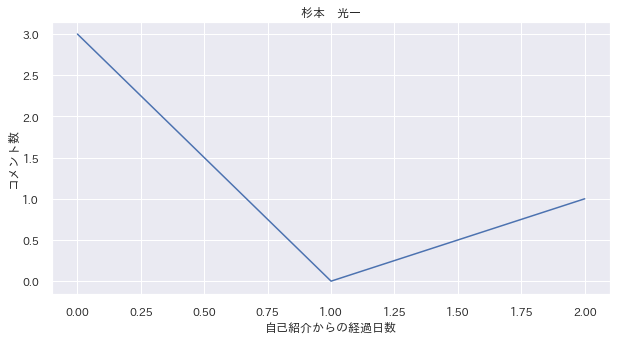

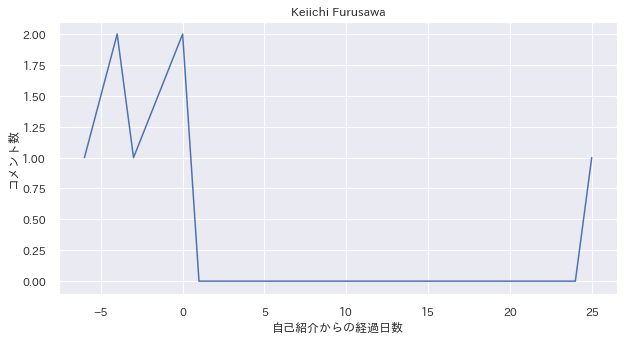

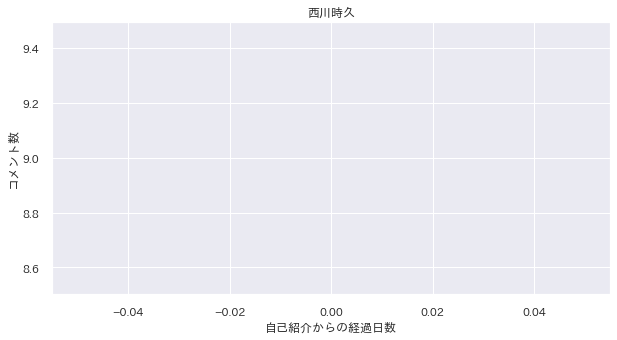

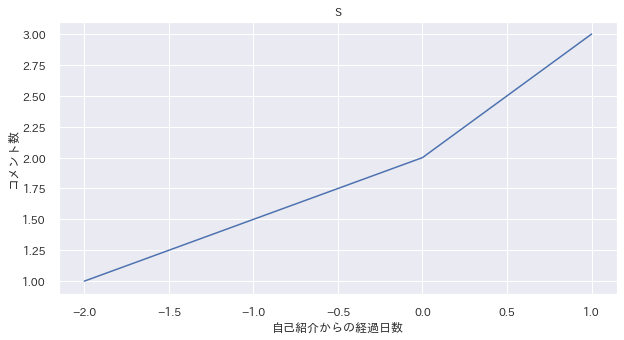

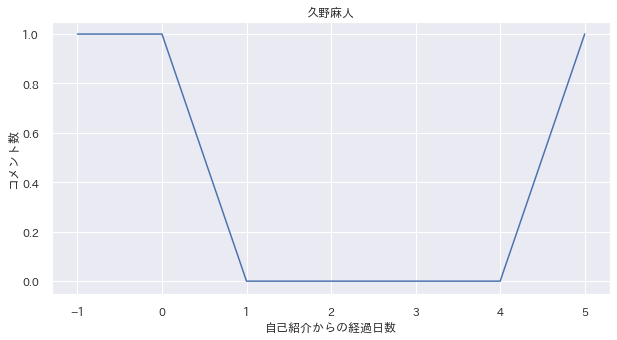

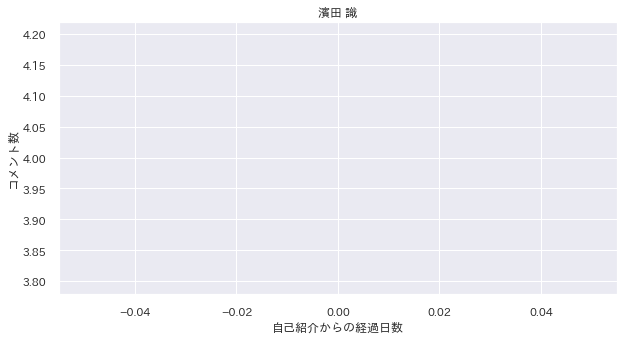

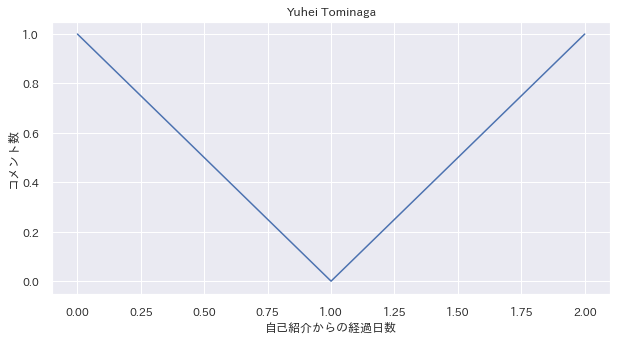

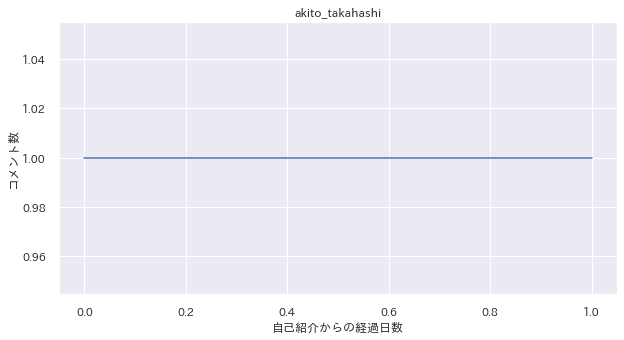

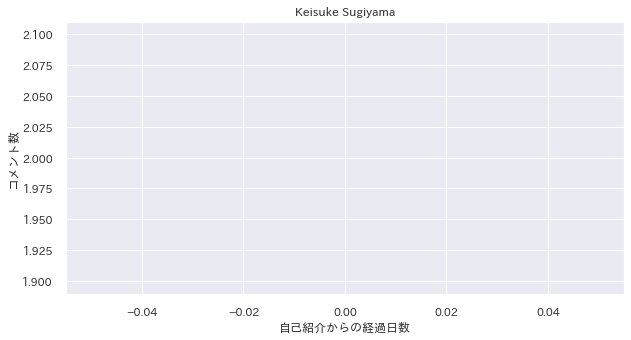

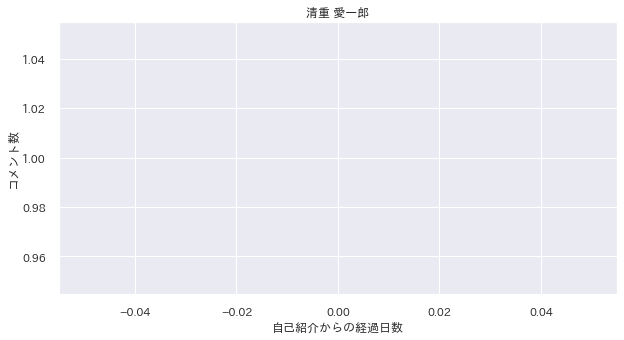

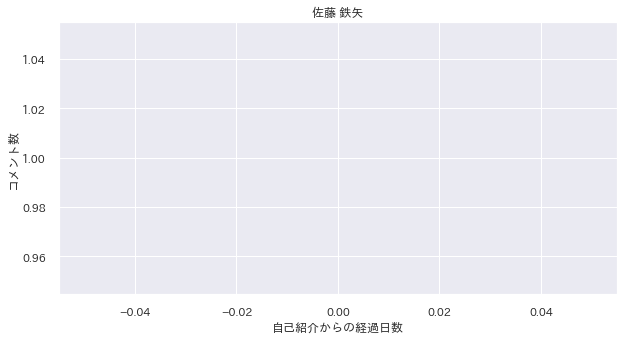

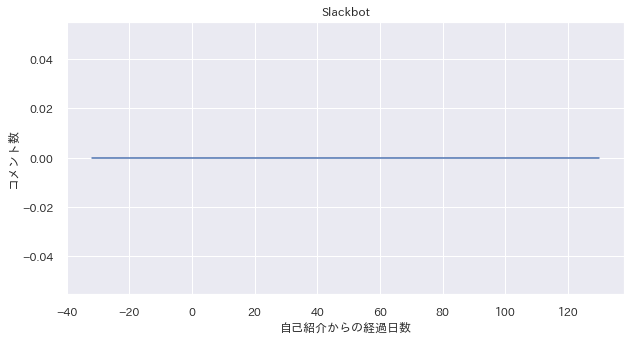

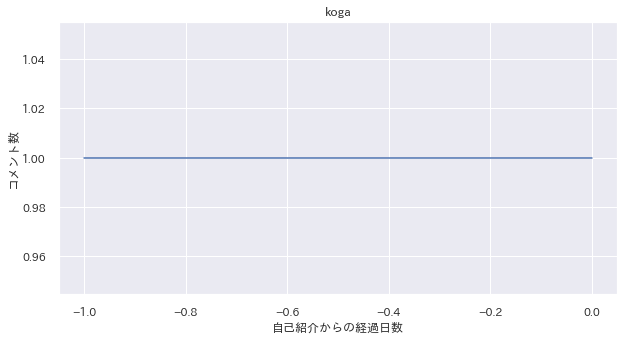

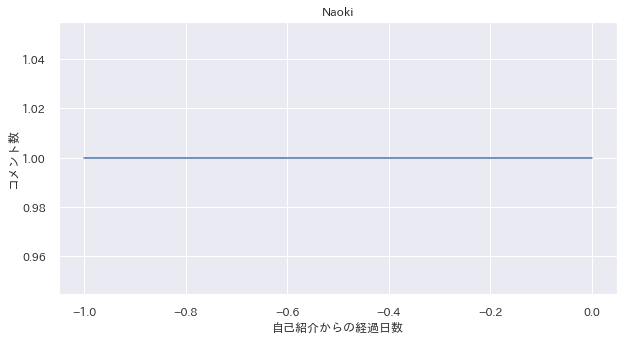

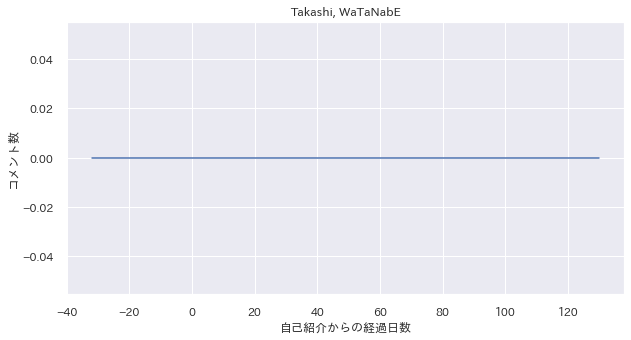

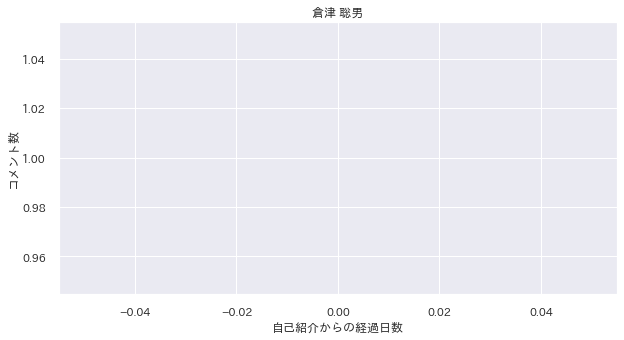

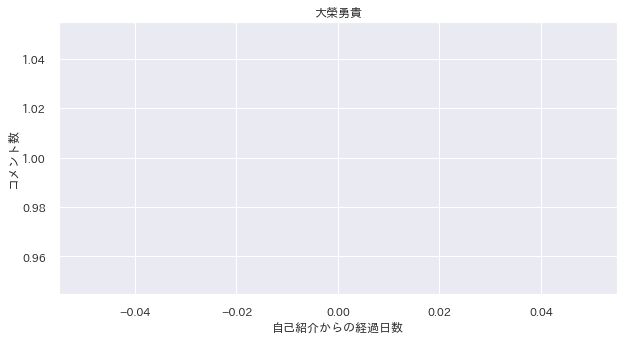

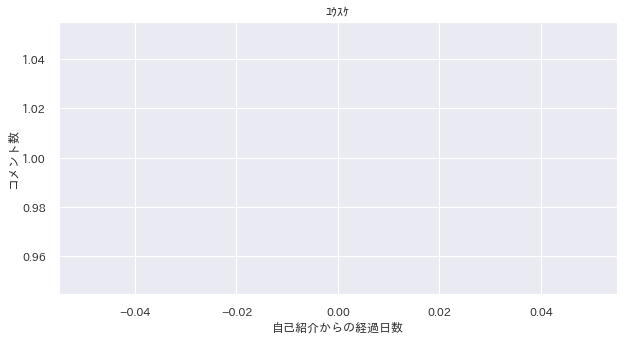

In [6]:
def plot(users_list):
    for user in users_list:
        df_yoshimura = df[df['talk_user'] == user]
        df_yoshimura['index'] = df['elapsed_int'].copy()
        df_yoshimura_comments = df_yoshimura.groupby(
            'index').count().sort_values('index')

        for days in range(df_yoshimura_comments.index[-1]):
            if days not in df_yoshimura_comments.index:
                df_yoshimura_comments.loc[days] = 0

        df_yoshimura_comments.sort_index(inplace=True)

        sns.set(font="IPAexGothic")

        plt.figure(figsize=(10, 5))
        ax = sns.lineplot(x=df_yoshimura_comments.index,
                          y="text", data=df_yoshimura_comments)

        ax.set_xlabel('自己紹介からの経過日数')
        ax.set_ylabel('コメント数')
        plt.title(user)
        plt.show()
        try:
            ax.get_figure().savefig(f'./images/{user}.png')
        except:
            print(f'{user}の画像書き出しに失敗しました')


plot(rank_a_list)
# plot(rank_a_unsub_list)
plot(rank_b_list)
plot(rank_b_unsub_list)
plot(rank_c_list)
plot(rank_c_unsub_list)


/Users/naokikomiya/dev_komiya/dlg_slack_competition/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


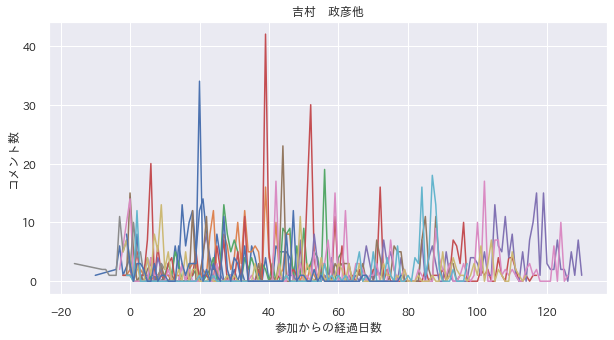

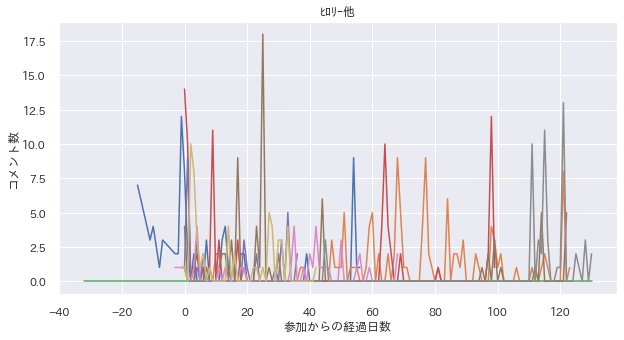

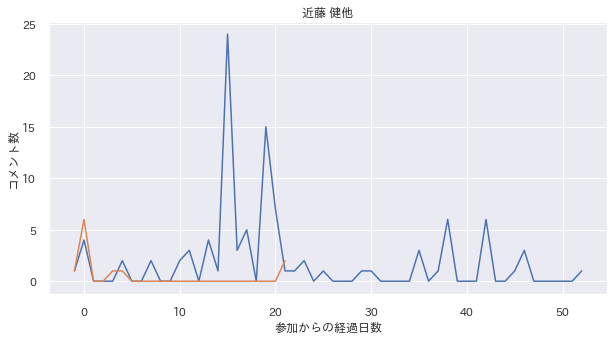

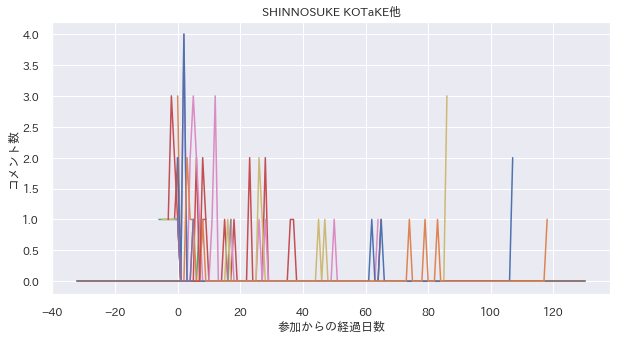

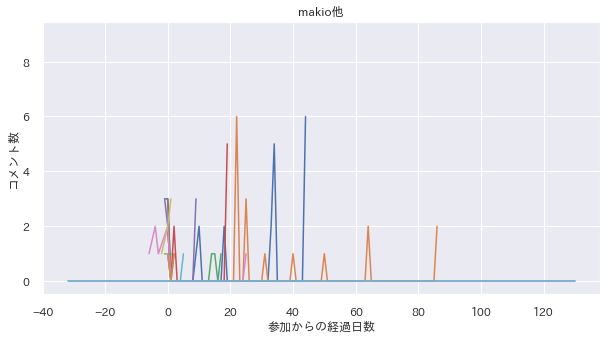

In [7]:


def plot_all(users_list):
    sns.set(font="IPAexGothic")
    plt.figure(figsize=(10, 5))
    plt.title(f'{users_list[0]}他')

    for user in users_list:
        df_yoshimura = df[df['talk_user'] == user]
        df_yoshimura['index'] = df['elapsed_int'].copy()
        df_yoshimura_comments = df_yoshimura.groupby(
            'index').count().sort_values('index')

        for days in range(df_yoshimura_comments.index[-1]):
            if days not in df_yoshimura_comments.index:
                df_yoshimura_comments.loc[days] = 0

        df_yoshimura_comments.sort_index(inplace=True)

        sns.lineplot(x=df_yoshimura_comments.index,
                     y="text", data=df_yoshimura_comments)

    plt.xlabel('参加からの経過日数')
    plt.ylabel('コメント数')
    plt.show()
    # get_figure().savefig(f'./images/{users_list}.png')


plot_all(rank_a_list)
# pl_allot(rank_a_unsub_list)
plot_all(rank_b_list)
plot_all(rank_b_unsub_list)
plot_all(rank_c_list)
plot_all(rank_c_unsub_list)